### Is it possible to detect malicious pages using URL features?
teste_Todas

In [63]:
import tensorflow

__Etapas__:

* Análise de Dados

* Transformação dos Dados
    * Conversão para Números
    * Conversão para Binários
    
* Resultados
    * Treinamento e Classificação




## Códigos base para implementação de AM e de rede neural em Keras

In [66]:
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import pandas as pd
import time
import os
from sklearn import datasets, svm, metrics
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score as sklearn_roc_auc_score
from sklearn.metrics import accuracy_score as sklearn_accuracy_score
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [67]:
from keras import backend as K
from keras.layers import Input, Dense, Activation, BatchNormalization, Dropout
from keras.models import Model
from keras.optimizers import Nadam, SGD,Adam
from keras.callbacks import EarlyStopping
import seaborn as sns

## Analise dos Dados da Base

#### A base do _detect malicious pages using URL_ foi utilizada como fonte de informação para que os algoritmos de aprendizadem de máquina e de redes neurais gerem modelos que prevejam se URL é maliciosa ou não.
#### Para analisa os dados da base é necessário importá-la.

In [68]:
base_path='base_URL/testeProWekaTodas.csv'
base = pd.read_csv(base_path)

### Para mostrar os 5 primeiros registros usamos a função 'head()'

In [69]:
base.head()

,qt_tok_dom_ponto,qt_tok_dom_hifen,qt_tok_dom_underline,qt_tok_dir_ponto,qt_tok_dir_barra,qt_tok_dir_interrog,qt_tok_dir_igualdade,qt_tok_dir_hifen,qt_tok_dir_underline,qt_tok_dir_arroba,...,mal_phi,presenca_marca,ip_assoc,sn_assoc,data_tempo_ativo,geo_localizacao,rank_google,rank_alexa,rbl_check,classe
0,2,0.0,0,0,0,0,0,0,0,0,...,0,0,1,6,0,AE,6,-1,24,benigna
1,2,0.0,0,0,0,0,0,0,0,0,...,0,0,1,4,0,AE,5,-1,16,benigna
2,1,0.0,0,0,0,0,0,0,0,0,...,0,0,1,2,0,AR,3,-1,8,benigna
3,3,0.0,0,0,0,0,0,0,0,0,...,0,0,1,4,0,AR,3,-1,8,benigna
4,2,0.0,0,0,0,0,0,0,0,0,...,0,0,1,3,0,AT,2,2334,10,benigna


In [70]:
colunas = base.drop(['classe'], axis=1).columns
colunas

Index([u'qt_tok_dom_ponto', u'qt_tok_dom_hifen', u'qt_tok_dom_underline',
       u'qt_tok_dir_ponto', u'qt_tok_dir_barra', u'qt_tok_dir_interrog',
       u'qt_tok_dir_igualdade', u'qt_tok_dir_hifen', u'qt_tok_dir_underline',
       u'qt_tok_dir_arroba', u'qt_tok_dir_exclam', u'at_tok_dir_til',
       u'qt_tok_arq_ponto', u'qt_tok_arq_interrog', u'qt_tok_arq_igualdade',
       u'qt_tok_arq_hifen', u'qt_tok_arq_underline', u'qt_tok_arq_arroba',
       u'qt_tok_arq_exclam', u'at_tok_arq_til', u'qt_tok_par_ponto',
       u'qt_tok_par_barra', u'qt_tok_par_interrog', u'qt_tok_par_igualdade',
       u'qt_tok_par_hifen', u'qt_tok_par_underline', u'qt_tok_par_arroba',
       u'qt_tok_par_ecomerc', u'qt_tok_par_exclam', u'at_tok_par_til',
       u'qt_params', u'qt_tok_url_ponto', u'qt_tok_url_barra',
       u'qt_tok_url_interrog', u'qt_tok_url_igualdade', u'qt_tok_url_hifen',
       u'qt_tok_url_underline', u'qt_tok_url_arroba', u'qt_tok_url_ecomerc',
       u'qt_tok_url_exclam', u'at_tok_url_ti

### Abaixo seguem os histogramas dos atributos númericos

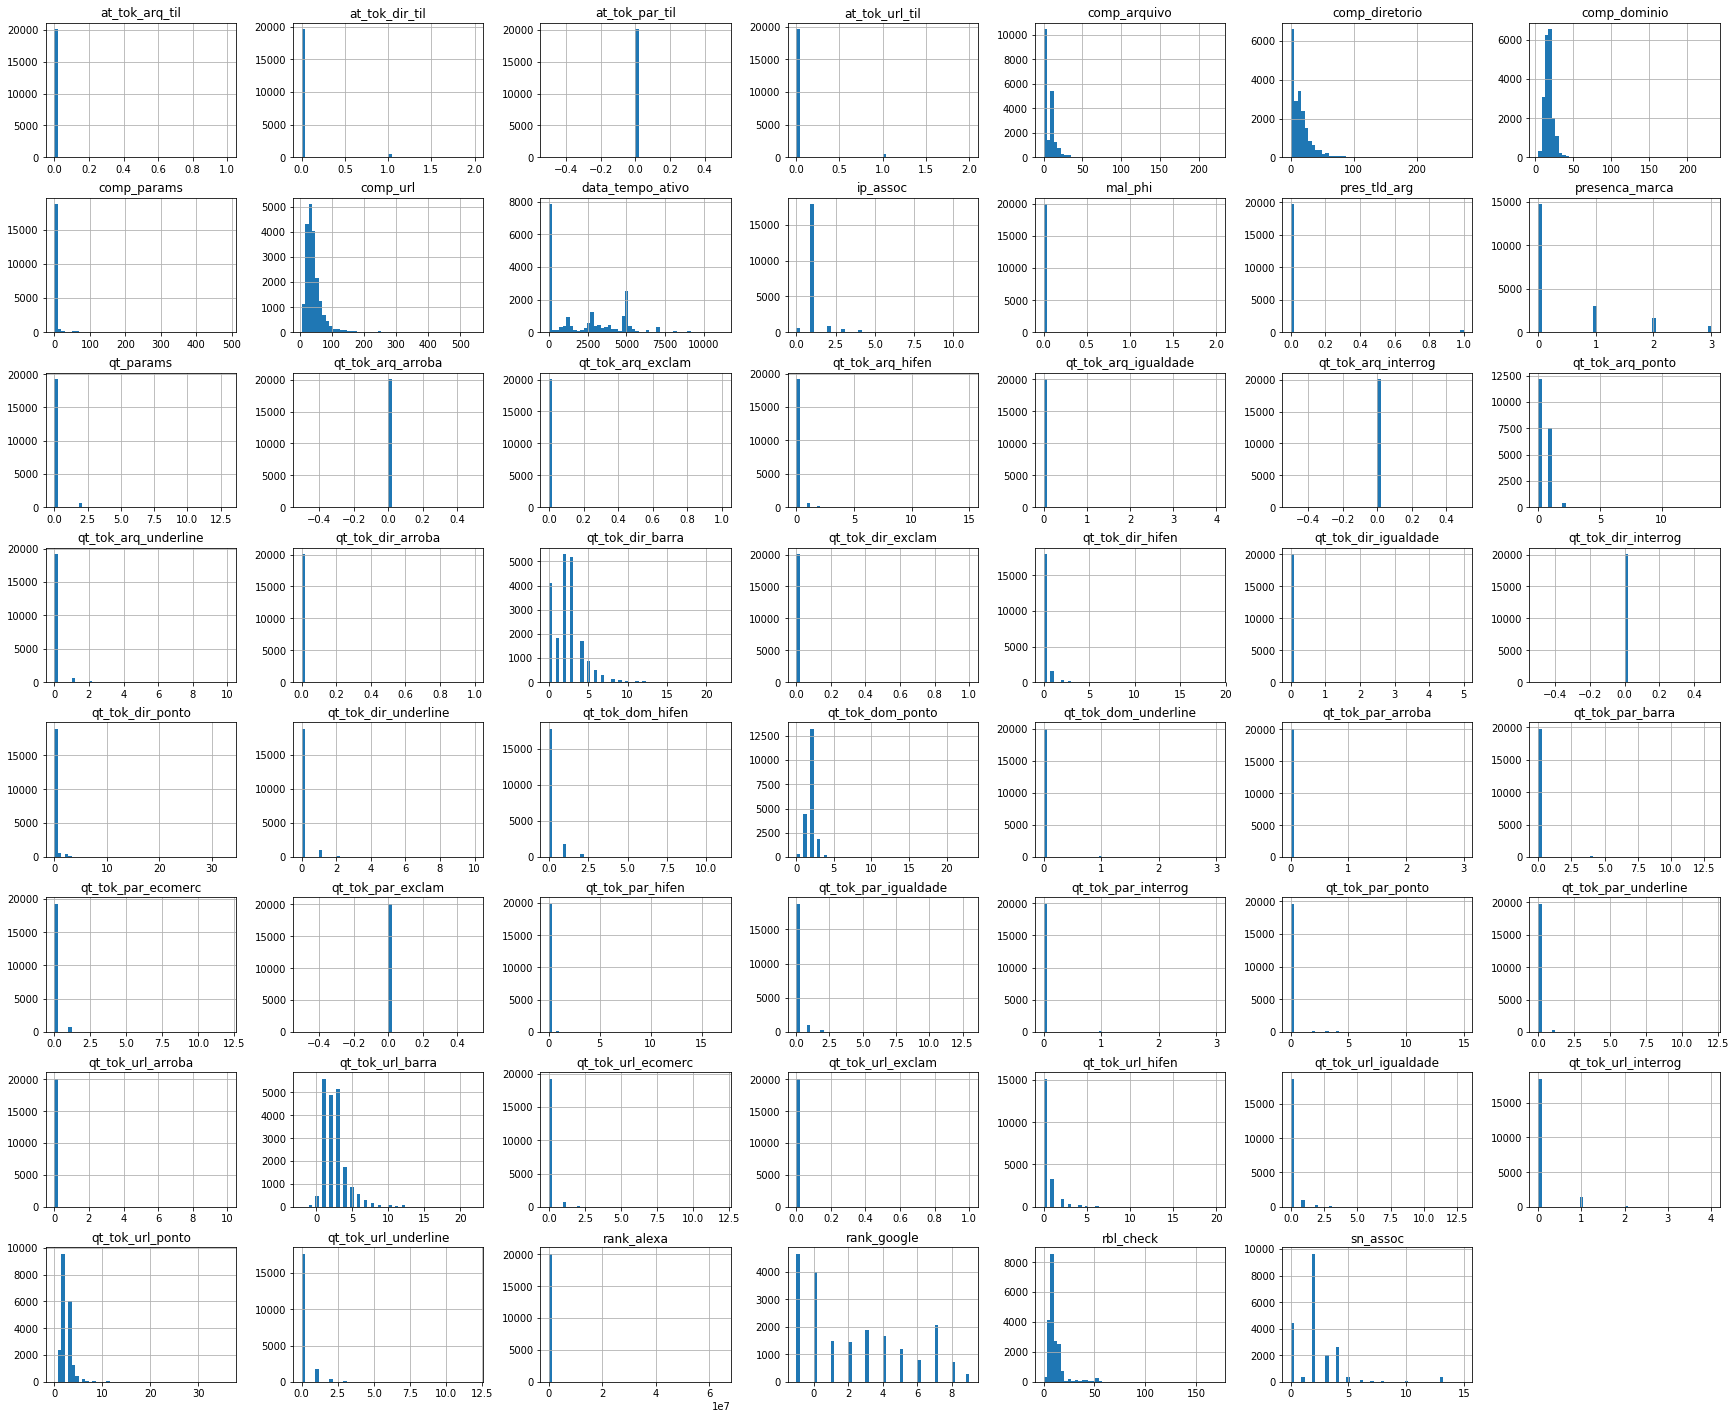

In [71]:
base.hist(bins=50, figsize=(30,25))
plt.show()

## Transformação dos Dados

### Conversão para binários

In [72]:
for c in colunas:
    dummies = pd.get_dummies(base[c], prefix = c)
    base = base.drop(c, axis = 1).join(dummies)

In [73]:
base.head(3)

,classe,qt_tok_dom_ponto_0,qt_tok_dom_ponto_1,qt_tok_dom_ponto_2,qt_tok_dom_ponto_3,qt_tok_dom_ponto_4,qt_tok_dom_ponto_5,qt_tok_dom_ponto_6,qt_tok_dom_ponto_7,qt_tok_dom_ponto_8,...,rbl_check_89,rbl_check_90,rbl_check_92,rbl_check_103,rbl_check_104,rbl_check_105,rbl_check_111,rbl_check_123,rbl_check_138,rbl_check_170
0,benigna,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,benigna,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,benigna,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A função 'get_dummies' transforma os campos em atributos binários. Logo, podemos incorporar esses novos campos ao dataframe

In [74]:
base['classe'] = base['classe'].astype('category').cat.codes

transforma a class em número

In [75]:
base.head()

,classe,qt_tok_dom_ponto_0,qt_tok_dom_ponto_1,qt_tok_dom_ponto_2,qt_tok_dom_ponto_3,qt_tok_dom_ponto_4,qt_tok_dom_ponto_5,qt_tok_dom_ponto_6,qt_tok_dom_ponto_7,qt_tok_dom_ponto_8,...,rbl_check_89,rbl_check_90,rbl_check_92,rbl_check_103,rbl_check_104,rbl_check_105,rbl_check_111,rbl_check_123,rbl_check_138,rbl_check_170
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
base.classe.value_counts()

1    10046
0    10046
Name: classe, dtype: int64

Exibe a quantidade de linhas e colunas (atributos)

In [77]:
y = base['classe'].values
X = base.drop("classe", axis=1).values

In [78]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int8)

In [79]:
X.shape

(20092, 2713)

In [80]:
X[:1]

array([[0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [81]:
y.shape

(20092,)

In [82]:
y[:1]

array([0], dtype=int8)

## Resultados

Os experimentos foram executados para cada algoritmos: Random Forest, SVM, Naive Bayes, Decision Trees, Nearest Neighbors, Rede Neural Simples, Rede Neural com normalização em Batch, Rede Neural com Dropout e Rede Neural com normalização em Batch e Dropout. Foi utilizado Kfolds k=10 dividir a base em 10 subconjuntos (treinamento e teste).

Validação cruzada K-Folds
Fornece índices de treino / teste para dividir os dados nos conjuntos de treinamento / teste. Dividir o conjunto de dados em k dobras consecutivas (sem embaralhar por padrão). Cada dobra é então usada uma vez como validação, enquanto as dobras remanescentes k - 1 formam o conjunto de treino.

No aprendizado de máquina, geralmente dividimos o conjunto de dados em conjunto de dados de treinamento, conjunto de dados de validação e conjunto de dados de teste.

In [83]:
kf = StratifiedKFold(n_splits=10)
kf.get_n_splits(X,y)
print(kf)
#KFold(n_splits=10, random_state=None, shuffle=False)
#for train_index, test_index in kf.split(X):
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


# Algoritmos de Aprendizagem de Máquina

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
score_RF = []
mc = []
prec = []
recall = []
n_estimators = 10
t1=time.time()
for train_index, test_index in kf.split(X,y): 
    clf_RF = RandomForestClassifier(n_estimators=n_estimators, random_state=50)
    clf_RF.fit(X[train_index], y[train_index])
    score_RF.append(clf_RF.score(X[test_index], y[test_index]))
    pred = clf_RF.predict(X[test_index])
    prec.append(precision_score(y[test_index],pred, average='weighted'))
    recall.append(recall_score(y[test_index],pred, average='weighted'))
    y_pred = clf_RF.predict(X[test_index])
    mc.append(confusion_matrix(y[test_index], y_pred))

labels = clf_RF
t2=time.time()

temp = (t2-t1) # tempo (s)
scores_RF = np.array(score_RF).mean() # acurácia
recall = np.array(recall).mean()
prec = np.array(prec).mean()


labels = {'tempo':temp, 'scores_RF':scores_RF, 'recall':recall, 'precisao':prec, 'mc':mc, 'n_estimators':n_estimators}
results = 'results'
with open(os.path.join(results, 'Random_Forest.txt'), 'w') as fp:
        for i in labels:
            fp.write('{}:{}\n'.format(i,labels[i]))

In [ ]:
labels

In [ ]:
print(t2-t1) #tempo(s)

Accuracy

In [ ]:
np.array(score_RF).mean()

In [ ]:
score_RF

Confusion matrix

In [ ]:
for i in mc:
    print(i)

In [ ]:
type(y_pred)

Rate Recall

In [ ]:
np.array(recall).mean()

Rate Precision

In [ ]:
np.array(prec).mean()

Feature Importance

In [ ]:
for name, importance in zip(base.drop("classe", axis=1).columns, clf_RF.feature_importances_):
    print(name,importance)

Exibe as importâncias dos atributos na base

## SVM

In [84]:
from sklearn import svm

In [ ]:
score_SVM = []
mc = []
prec = []
recall = []
C=8.0
t1=time.time()
for train_index, test_index in kf.split(X,y): 
    clf_SVM = svm.SVC(C=C, random_state=42)
    clf_SVM.fit(X[train_index], y[train_index])
    score_SVM.append(clf_SVM.score(X[test_index], y[test_index]))
    pred = clf_SVM.predict(X[test_index])
    prec.append(precision_score(y[test_index],pred, average='weighted'))
    recall.append(recall_score(y[test_index],pred, average='weighted'))
    y_pred = clf_SVM.predict(X[test_index])
    mc.append(confusion_matrix(y[test_index], y_pred))

labels = clf_SVM
t2=time.time()

temp = (t2-t1) # tempo (s)
scores_SVM = np.array(score_SVM).mean() # acurácia
recall = np.array(recall).mean()
prec = np.array(prec).mean()


labels = {'tempo':temp, 'scores_SVM':scores_SVM, 'recall':recall, 'precisao':prec, 'mc':mc, 'C':C}
results = 'results'
with open(os.path.join(results, 'SVM_8.txt'), 'w') as fp:
        for i in labels:
            fp.write('{}:{}\n'.format(i,labels[i]))

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
labels

In [ ]:
print(t2-t1) #tempo(s)

In [ ]:
clf_SVM = svm.SVC()
clf_SVM

Accuracy

In [ ]:
np.array(score_SVM).mean()

In [ ]:
score_SVM

Confusion matrix

In [ ]:
for i in mc:
    print(i)

In [ ]:
type(y_pred)

Rate Recall

In [ ]:
np.array(recall).mean()

Rate Precision

In [ ]:
np.array(prec).mean()

In [ ]:
score_SVM, mc, recall, prec

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
score_NB = []
mc = []
prec = []
recall = []
t1=time.time()
for train_index, test_index in kf.split(X,y): 
    clf_gnb = GaussianNB()
    clf_gnb.fit(X[train_index], y[train_index])
    score_NB.append(clf_gnb.score(X[test_index], y[test_index]))
    pred = clf_gnb.predict(X[test_index])
    prec.append(precision_score(y[test_index],pred, average='weighted'))
    recall.append(recall_score(y[test_index],pred, average='weighted'))
    y_pred = clf_gnb.predict(X[test_index])
    mc.append(confusion_matrix(y[test_index], y_pred))
    

labels = clf_gnb
t2=time.time()

temp = (t2-t1) # tempo (s)
scores_NB = np.array(score_NB).mean() # acurácia
recall = np.array(recall).mean()
prec = np.array(prec).mean()


labels = {'tempo':temp, 'scores_NB':scores_NB, 'recall':recall, 'precisao':prec, 'mc':mc}
results = 'results'
with open(os.path.join(results, 'Naive_Bayes.txt'), 'w') as fp:
        for i in labels:
            fp.write('{}:{}\n'.format(i,labels[i]))
            

In [ ]:
clf_gnb = GaussianNB()
clf_gnb

In [ ]:
print(t2-t1) #tempo (s)

Accuracy

In [ ]:
np.array(score_NB).mean()

In [ ]:
score_NB

Confusion Matrix

In [ ]:
for i in mc:
    print(i)

In [ ]:
type(y_pred)

Rate Recall

In [ ]:
np.array(recall).mean()

Rate Precision

In [ ]:
np.array(prec).mean()

In [ ]:
#results_NB = 'results_NB'
#with open(os.path.join(results_NB, 'Naive_Bayes.txt.txt'), 'w') as fp:
 #       for i in range(len(labels)):
  #          fp.write('{}\n'.format(labels[i]))

## Decision Trees

In [ ]:
from sklearn import tree

In [ ]:
score_DT = []
mc = []
prec = []
recall = []
min_samples_split=25
t1=time.time()

for train_index, test_index in kf.split(X,y):
    clf_dt = tree.DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=42)
    clf_dt.fit(X[train_index], y[train_index])
    score_DT.append(clf_dt.score(X[test_index], y[test_index]))
    pred = clf_dt.predict(X[test_index])
    prec.append(precision_score(y[test_index],pred, average='weighted'))
    recall.append(recall_score(y[test_index],pred, average='weighted'))
    y_pred = clf_dt.predict(X[test_index])
    mc.append(confusion_matrix(y[test_index], y_pred))


labels = clf_dt
t2=time.time()

temp = (t2-t1) # tempo (s)
scores_DT = np.array(score_DT).mean() # acurácia
recall = np.array(recall).mean()
prec = np.array(prec).mean()


labels = {'tempo':temp, 'scores_DT':scores_DT, 'recall':recall, 'precisao':prec, 'mc':mc, 'min_samples_split':min_samples_split}
results = 'results'
with open(os.path.join(results, 'Decision_Tree.txt'), 'w') as fp:
        for i in labels:
            fp.write('{}:{}\n'.format(i,labels[i]))


In [ ]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt

In [ ]:
print(t2-t1) #tempo (s)

Accuracy

In [ ]:
np.array(score_DT).mean()

In [ ]:
score_DT

Confusion Matrix

In [ ]:
for i in mc:
    print(i)

In [ ]:
type(y_pred)

Rate Recall

In [ ]:
np.array(recall).mean()

Rate Precision

In [ ]:
np.array(prec).mean()

## Nearest Neighbors

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
score_KNN = []
mc = []
prec = []
recall = []
t1=time.time()
n_neighbors=200
for train_index, test_index in kf.split(X,y):   
    
    clf_neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf_neigh.fit(X[train_index], y[train_index])
    score_KNN.append(clf_neigh.score(X[test_index], y[test_index]))
    pred = clf_neigh.predict(X[test_index])
    prec.append(precision_score(y[test_index],pred, average='weighted'))
    recall.append(recall_score(y[test_index],pred, average='weighted'))
    y_pred = clf_neigh.predict(X[test_index])
    mc.append(confusion_matrix(y[test_index], y_pred))

labels = clf_neigh
t2=time.time()

temp = (t2-t1) # tempo (s)
scores_KNN = np.array(score_KNN).mean() # acurácia
recall = np.array(recall).mean()
prec = np.array(prec).mean()


labels = {'tempo':temp, 'scores_KNN':scores_KNN, 'recall':recall, 'precisao':prec, 'mc':mc, 'n_neighbors':n_neighbors}
results = 'results'
with open(os.path.join(results, 'KNN_200.txt'), 'w') as fp:
        for i in labels:
            fp.write('{}:{}\n'.format(i,labels[i]))


KeyboardInterrupt: 

In [ ]:
clf_neigh = KNeighborsClassifier()
clf_neigh

In [ ]:
print(t2-t1) #tempo(s)

Accuracy

In [ ]:
np.array(score_KNN).mean()

In [ ]:
score_KNN

Confusion Matrix

In [ ]:
for i in mc:
    print(i)

In [ ]:
type(y_pred)

Rate Recall

In [ ]:
np.array(recall).mean()

Rate Precision

In [ ]:
np.array(prec).mean()

## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
score_AB = []
mc = []
prec = []
recall = []
n_estimators = 50
learning_rate=1.0
t1=time.time()

for train_index, test_index in kf.split(X,y):
    clf_AB = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, algorithm='SAMME.R', random_state=42)
    clf_AB.fit(X[train_index], y[train_index])
    score_AB.append(clf_AB.score(X[test_index], y[test_index]))
    pred = clf_AB.predict(X[test_index])
    prec.append(precision_score(y[test_index],pred, average='weighted'))
    recall.append(recall_score(y[test_index],pred, average='weighted'))
    y_pred = clf_AB.predict(X[test_index])
    mc.append(confusion_matrix(y[test_index], y_pred))


labels = clf_AB
t2=time.time()

temp = (t2-t1) # tempo (s)
scores_AB = np.array(score_AB).mean() # acurácia
recall = np.array(recall).mean()
prec = np.array(prec).mean()

labels = {'tempo':temp, 'scores_AB':scores_AB, 'recall':recall, 'precisao':prec, 'mc':mc, 'n_estimators':n_estimators, 'learning_rate':learning_rate}
results = 'results'
with open(os.path.join(results, 'AB.txt'), 'w') as fp:
        for i in labels:
            fp.write('{}:{}\n'.format(i,labels[i]))


In [ ]:
print(t2-t1) #tempo (s)

In [ ]:
#base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None
clf_AB = AdaBoostClassifier()
clf_AB

Accuracy

In [ ]:
np.array(score_AB).mean()

In [ ]:
score_AB

Confusion Matrix

In [ ]:
for i in mc:
    print(i)

In [ ]:
type(y_pred)

Rate Recall

In [ ]:
np.array(recall).mean()

Rate Precision

In [ ]:
np.array(prec).mean()

# Rede Neural

Os parâmetros modificados foram: a camada de entrada [10~200], nas camadas escondidas [100 e 200], a função de ativação hard_sigmoid() e relu() e Dropout [0.5 e 0.7]. Foram utilizadas 3 camadas escondidas, 1 camada de saída (função de ativação hard_sigmoid()) e 1000 épocas.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

## Rede Neural Simples

In [ ]:
def plot_model_history(model_history):
    # summarize history for loss
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='best')
    plt.show()
    

In [ ]:
def get_model(X_input_size):
    '''
        get_model cria um modelo de rede neural  
        X_input_size: número de atributos em X
    '''
    input_data = Input(name='input', shape=(X_input_size,), dtype='float32')
    
    x = input_data
    x = Dense(units = 200)(x)
    x = Activation('relu')(x)
      
    #--------------------------
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    #--------------------------
    
    x = Dense(units = 1)(x)
    y_pred = Activation('relu')(x)
    
    model = Model(inputs=input_data, outputs=y_pred)
    
    # modelo será treinado com otimizador SGD -- vc pode trocar o otimizador
    #optimizer = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    optimizer = Adam(lr=0.0001)
    
    # função de custo usada é a entropia cruzada
    model.compile(loss='binary_crossentropy', optimizer = optimizer,metrics=['accuracy']) 
    
    return model

In [ ]:
def train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20):

    # estratégia de treino com parada antecipada consiste em parar o treino
    # quando nenhuma melhoria no erro de validação (val_loss) é observada após
    # "patience" épocas
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=patience, \
                verbose=1, mode='auto')
    callback_list = [earlystop]
    
    # Modelo usa parâmetros comuns que podem ser modificados
    h = model.fit(X_train, y_train, batch_size=bsize, epochs=n_epochs,validation_data=(X_test,y_test),
                  verbose=2, shuffle = True, callbacks = callback_list, 
                  validation_split=val_proportion)
    plot_model_history(h)          
    
    # avaliação
    print('\nEstimating AUCROC, acc')
    y_pred = model.predict(X_test, batch_size=len(y_test))
    print('ROC value: %.4f'%(sklearn_roc_auc_score(y_test, y_pred)))
    print('Acc: %.4f'%(sklearn_accuracy_score(y_test, y_pred>0.5)))
    print('CMatrix: %s'%(sklearn_confusion_matrix(y_test, y_pred>0.5)))
    
    return model

In [ ]:
X_train.shape

In [ ]:
model=get_model(X_train.shape[1])

In [ ]:
model.summary()

In [ ]:
train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20)


## Rede Neural com normalização em Batch

In [ ]:
def plot_model_history(model_history):
    # summarize history for loss
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='best')
    plt.show()

In [ ]:
def get_model(X_input_size):
    '''
        get_model cria um modelo de rede neural  
        X_input_size: número de atributos em X
    '''
    input_data = Input(name='input', shape=(X_input_size,), dtype='float32')
    
    x = input_data
    x = Dense(units = 80)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
     
    #--------------------------
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)      
    #--------------------------
    
    x = Dense(units = 1)(x)
    y_pred = Activation('relu')(x)
    
    model = Model(inputs=input_data, outputs=y_pred)
    
    # modelo será treinado com otimizador SGD -- vc pode trocar o otimizador
    #optimizer = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    optimizer = Adam(lr=0.0001)
    
    # função de custo usada é a entropia cruzada
    model.compile(loss='binary_crossentropy', optimizer = optimizer,metrics=['accuracy']) 
    
    return model

In [ ]:
def train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20):

    # estratégia de treino com parada antecipada consiste em parar o treino
    # quando nenhuma melhoria no erro de validação (val_loss) é observada após
    # "patience" épocas
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=patience, \
                verbose=1, mode='auto')
    callback_list = [earlystop]
    
    # Modelo usa parâmetros comuns que podem ser modificados
    h = model.fit(X_train, y_train, batch_size=bsize, epochs=n_epochs,validation_data=(X_test,y_test),
                  verbose=2, shuffle = True, callbacks = callback_list, 
                  validation_split=val_proportion)
    plot_model_history(h)          
    
    # avaliação
    print('\nEstimating AUCROC, acc')
    y_pred = model.predict(X_test, batch_size=len(y_test))
    print('ROC value: %.4f'%(sklearn_roc_auc_score(y_test, y_pred)))
    print('Acc: %.4f'%(sklearn_accuracy_score(y_test, y_pred>0.5)))
    print('CMatrix: %s'%(sklearn_confusion_matrix(y_test, y_pred>0.5)))
    
    return model

In [ ]:
X_train.shape

In [ ]:
model=get_model(X_train.shape[1])

In [ ]:
model.summary()

In [ ]:
train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20)

## Rede Neural com Dropout

In [ ]:
def plot_model_history(model_history):
    # summarize history for loss
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='best')
    plt.show()

In [ ]:
def get_model(X_input_size):
    '''
        get_model cria um modelo de rede neural  
        X_input_size: número de atributos em X
    '''
    input_data = Input(name='input', shape=(X_input_size,), dtype='float32')
    
    x = input_data
    x = Dense(units = 200)(x)
    x = Activation('relu')(x)
    x = Dropout(0.7)(x)
    
    #--------------------------
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)   
    
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x) 
    
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)    
    #--------------------------
    
    x = Dense(units = 1)(x)
    y_pred = Activation('relu')(x)
    
    model = Model(inputs=input_data, outputs=y_pred)
    
    # modelo será treinado com otimizador SGD -- vc pode trocar o otimizador
    #optimizer = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    optimizer = Adam(lr=0.0001)
    
    # função de custo usada é a entropia cruzada
    model.compile(loss='binary_crossentropy', optimizer = optimizer,metrics=['accuracy']) 
    
    return model

In [ ]:
def train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20):

    # estratégia de treino com parada antecipada consiste em parar o treino
    # quando nenhuma melhoria no erro de validação (val_loss) é observada após
    # "patience" épocas
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=patience, \
                verbose=1, mode='auto')
    callback_list = [earlystop]
    
    # Modelo usa parâmetros comuns que podem ser modificados
    h = model.fit(X_train, y_train, batch_size=bsize, epochs=n_epochs,validation_data=(X_test,y_test),
                  verbose=2, shuffle = True, callbacks = callback_list, 
                  validation_split=val_proportion)
    plot_model_history(h)          
    
    # avaliação
    print('\nEstimating AUCROC, acc')
    y_pred = model.predict(X_test, batch_size=len(y_test))
    print('ROC value: %.4f'%(sklearn_roc_auc_score(y_test, y_pred)))
    print('Acc: %.4f'%(sklearn_accuracy_score(y_test, y_pred>0.5)))
    print('CMatrix: %s'%(sklearn_confusion_matrix(y_test, y_pred>0.5)))
    
    return model

In [ ]:
X_train.shape

In [ ]:
model=get_model(X_train.shape[1])

In [ ]:
model.summary()

In [ ]:
train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20)

## Rede Neural com  normalização em Batch e Dropout

In [ ]:
def plot_model_history(model_history):
    # summarize history for loss
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='best')
    plt.show()

In [ ]:
def get_model(X_input_size):
    '''
        get_model cria um modelo de rede neural  
        X_input_size: número de atributos em X
    '''
    input_data = Input(name='input', shape=(X_input_size,), dtype='float32')
    
    x = input_data
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.7)(x)
    
    #--------------------------
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)   
    
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)  
    
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)    
    #--------------------------
    
    x = Dense(units = 1)(x)
    y_pred = Activation('relu')(x)
    
    model = Model(inputs=input_data, outputs=y_pred)
    
    # modelo será treinado com otimizador SGD -- vc pode trocar o otimizador
    #optimizer = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    optimizer = Adam(lr=0.0001)
    
    # função de custo usada é a entropia cruzada
    model.compile(loss='binary_crossentropy', optimizer = optimizer,metrics=['accuracy']) 
    
    return model

In [ ]:
def train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20):

    # estratégia de treino com parada antecipada consiste em parar o treino
    # quando nenhuma melhoria no erro de validação (val_loss) é observada após
    # "patience" épocas
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=patience, \
                verbose=1, mode='auto')
    callback_list = [earlystop]
    
    # Modelo usa parâmetros comuns que podem ser modificados
    h = model.fit(X_train, y_train, batch_size=bsize, epochs=n_epochs,validation_data=(X_test,y_test),
                  verbose=2, shuffle = True, callbacks = callback_list, 
                  validation_split=val_proportion)
    plot_model_history(h)          
    
    # avaliação
    print('\nEstimating AUCROC, acc')
    y_pred = model.predict(X_test, batch_size=len(y_test))
    print('ROC value: %.4f'%(sklearn_roc_auc_score(y_test, y_pred)))
    print('Acc: %.4f'%(sklearn_accuracy_score(y_test, y_pred>0.5)))
    print('CMatrix: %s'%(sklearn_confusion_matrix(y_test, y_pred>0.5)))
    
    return model

In [ ]:
X_train.shape

In [ ]:
model=get_model(X_train.shape[1])

In [ ]:
model.summary()

In [ ]:
train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20)

In [ ]:
Rede Neural - LSTM

In [ ]:
keras.layers.LSTM(units, activation='tanh', 
    recurrent_activation='hard_sigmoid', use_bias=True, 
    kernel_initializer='glorot_uniform', 
    recurrent_initializer='orthogonal', 
    bias_initializer='zeros',
    unit_forget_bias=True,
                  
    kernel_regularizer=None, 
    recurrent_regularizer=None, 
    bias_regularizer=None, activity_regularizer=None,    
    kernel_constraint=None, recurrent_constraint=None, 
    bias_constraint=None, 
    dropout=0.0, recurrent_dropout=0.0, 
    implementation=1, return_sequences=False,
    return_state=False, go_backwards=False, 
    stateful=False, unroll=False)

In [ ]:
# First, let's define a RNN Cell, as a layer subclass.

class LSTM(keras.layers.LSTM):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(LSTM, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

# Let's use this cell in a RNN layer:

cell = LSTM(32)
x = keras.Input((None, 5))
layer = LSTM(cell)
y = layer(x)

# Here's how to use the cell to build a stacked RNN:

cells = [LSTM(32), LSTM(64)]
x = keras.Input((None, 5))
layer = LSTM(cells)
y = layer(x)

In [ ]:
# First, let's define a RNN Cell, as a layer subclass.

class MinimalRNNCell(keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

# Let's use this cell in a RNN layer:

cell = MinimalRNNCell(32)
x = keras.Input((None, 5))
layer = RNN(cell)
y = layer(x)

# Here's how to use the cell to build a stacked RNN:

cells = [MinimalRNNCell(32), MinimalRNNCell(64)]
x = keras.Input((None, 5))
layer = RNN(cells)
y = layer(x)